# Unsupervised Machine Learning Challenge

### Myopia Clusters

Fit data to a model and use clustering algorithms to place data into groups. Create visualization that shares my findings.

### Tasks:
1. Prepare the data
2. Apply Dimensionality Reduction
3. Perform a cluster analysis with k-means
4. Make recommendation

In [15]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Prepare The Data

In [2]:
#load data
file = "/Users/Jerry/Documents/myopia copy.csv"
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#remove the "MYOPIC" column from the dataset. 
# This target column is not needed during unsupervised machine learning because it will cause bias in unsupervised ML model.
data = df.drop("MYOPIC", axis=1)

In [4]:
#standardize dataset
# SO columns that contain larger values do not influence the outcome more than columns with smaller values

#create scaling model
scaler = StandardScaler()

#fit and transform data 
scaled_data = scaler.fit_transform(data)

## Apply Dimensionality Reduction

In [5]:
#perform dimensionality reduction with PCA (Principle Component Analysis) on scaled_data

#create PCA model
#using a .90 n_component to preserve a %90 explained variance in dimensionality reduction. 
pca = PCA(n_components=.90)

#fit and transform scaled data with pca model
pca_data = pca.fit_transform(scaled_data)

In [9]:
#Consider: How did the number of the features change after dimensionality reduction?
pca_data.shape

#Answer:
#The number of features was reduced from 14 to 10 features as proven by using the shape function on the data

(618, 10)

In [6]:
#Reduce dataset dimensionality further with t-SNE (t-distributed stochastic neighbor embedding)

#learning rate at 250 is a typical starting point. Range can be between (10-1000)
#A high learning rate will make the data look like a "ball", too low of a rate will make the data look like
#a dense cloud with few outliers
tsne = TSNE(learning_rate=350)

#fit and transform pca_data
tsne_data = tsne.fit_transform(pca_data)

/Users/Jerry/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
tsne_data.shape

(618, 2)

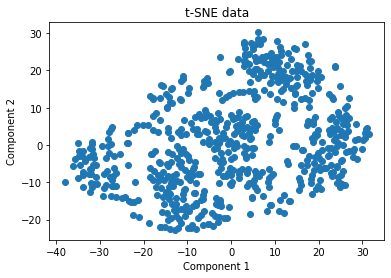

In [11]:
#Create a scatter plot of the t-sne output
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("t-SNE data")
plt.show()

Question:

Are there distinct cluster?

Answer:
I see 5, maybe 6 clusters. Although not every cluster is distinctly seperated.

## Perform a Cluster Analysis with K-means

In [16]:
#Create a elbow plot to identify the best number of clusters

#create a empty list to append inertia values to
inertia_list = []

#create for loop to determine the inertia for each k between 1-10
k = range(1,11)
for i in k:
    #create KMeans clustering model for each i
    km = KMeans(n_clusters=i, random_state=0)

    #fit model with tsne data
    km.fit(tsne_data)

    #append inertia_list with inertia values
    inertia_list.append(km.inertia_)

In [25]:
#create dataframe to inspect inertia values with respective k value
elbow_data = {'K': k, 'Inertia': inertia_list}
km_df = pd.DataFrame(elbow_data)
km_df

,K,Inertia
0,1,274159.062500
1,2,129589.359375
2,3,89333.859375
3,4,64323.515625
4,5,45149.546875
5,6,35605.730469
6,7,30550.476562
7,8,26676.589844
8,9,23193.480469
9,10,20045.039062


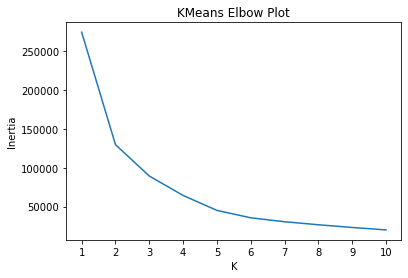

In [20]:
#elbow plot 
plt.plot(range(1,11), inertia_list)
plt.xticks(range(1,11))
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("KMeans Elbow Plot")
plt.show()

The elbow of the plot is at k = 6, meaning the best number of clusters in the dataset is 6. More specifically, looking at the inertia the value at which adding more clusters only marginally decreases the inertia is the best k value. This is why K=5 is not the best because the change of inertia from k=6 to k=7 is smaller then the change of inertia from k=5 to k=6.

## Recommendation

Questions: Can the patients be clustered? If so, into how many clusters?

Based off the visualization using the t-SNE model (t-distributed stochastic nieghbor embedding) and t-SNE data, the conclusion is patients can be clustered into multiple groups. Using the Kmean model and the elbow plot its determined that 6 clusters would be the best number of clusters to group patients. 